# 2. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/grouped_sales_train.csv')
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,year-month
0,0,0,32,884.0,6.0,2013-01
1,0,0,33,1041.0,3.0,2013-01
2,0,0,35,247.0,1.0,2013-01
3,0,0,43,221.0,1.0,2013-01
4,0,0,51,257.0,2.0,2013-01


In [3]:
df.shape

(1609124, 6)

## Bring in item categories

In [4]:
items = pd.read_csv('./data/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
df = df.merge(items[['item_id', 'item_category_id']], on = 'item_id', how = 'left')

In [6]:
# df.to_csv('./data/grouped_sales_train.csv', index = False)

## What is the most popular category?

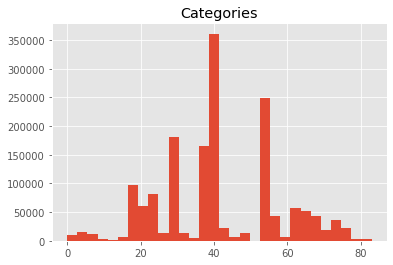

In [7]:
plt.hist(df['item_category_id'], bins=30)
plt.title('Categories');

## Average number of items

In [9]:
df['item_cnt_month'].describe()

count    1.609124e+06
mean     2.267200e+00
std      8.649882e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.253000e+03
Name: item_cnt_month, dtype: float64

Statistics on `item_cnt_day`:

- mean = 2.2672
- std = 8.6499
- min = -22.0000
- max = 2253

## What is the distribution of products by month?

Changing `year-month` to a datetime data type and setting it to index.

In [10]:
d_parser = lambda x: datetime.strptime(x, '%Y-%m')
df['year-month'] = df['year-month'].apply(d_parser)

In [11]:
df_date = df.copy()
df_date.set_index('year-month', inplace=True)

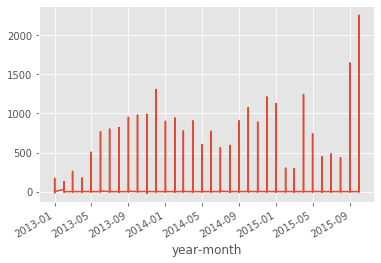

In [13]:
df_date['item_cnt_month'].plot()

In [14]:
mean_by_month = df_date.resample('M').mean().reset_index().copy()

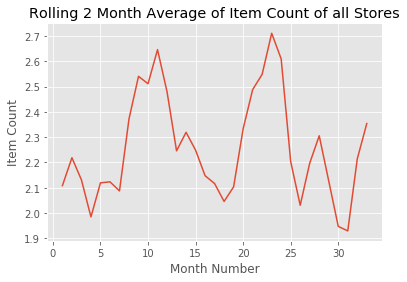

In [18]:
plt.plot(mean_by_month['item_cnt_month'].rolling(2).mean())
plt.title('Rolling 2 Month Average of Item Count of all Stores')
plt.xlabel('Month Number')
plt.ylabel('Item Count');

## Which store sells the most products overall?

In [72]:
shop_product_count = df.groupby('shop_id')['item_cnt_day'].sum()

In [73]:
shop_product_count = pd.DataFrame({'shop_id': shop_product_count.index,
                                   'item_count': shop_product_count.values})

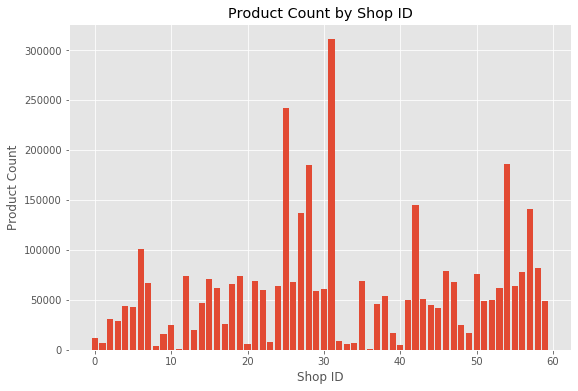

In [83]:
plt.figure(figsize=(9,6))
plt.bar(shop_product_count['shop_id'], shop_product_count['item_count'])
plt.title('Product Count by Shop ID');
plt.xlabel('Shop ID')
plt.ylabel('Product Count');

## Items sold by month

In [92]:
df_item_sum = df_date.resample('M').sum()
df_item_sum.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
year-month,,,,,,
2013-01-31,0,1849038,689570083,8.221187e+07,131479.0,2610652
2013-02-28,59935,1709162,635621832,7.558019e+07,128090.0,2498542
2013-03-31,127954,2096214,683889872,8.429831e+07,147142.0,2653902
2013-04-30,163914,1825649,584278228,6.151282e+07,107190.0,2285285
2013-05-31,213184,1778818,562835164,5.727413e+07,106970.0,2207195


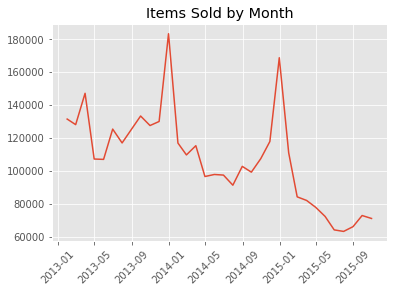

In [95]:
plt.plot(df_item_sum.index, df_item_sum['item_cnt_day'])
plt.title('Items Sold by Month')
plt.xticks(rotation=45);

## Which item is selling the most?

In [20]:
item_count = df.groupby('item_id')['item_cnt_month'].sum()

In [121]:
top_10_items = item_count.sort_values(ascending=False).head(10).index.tolist()
top_10_items

[20949, 2808, 3732, 17717, 5822, 3734, 6675, 3731, 1855, 16787]

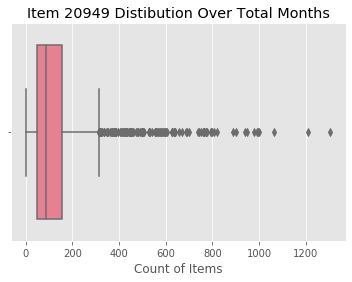

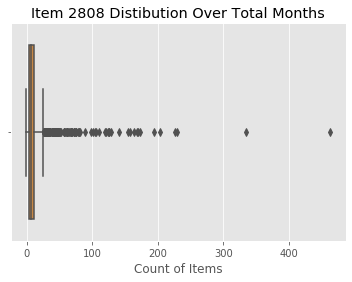

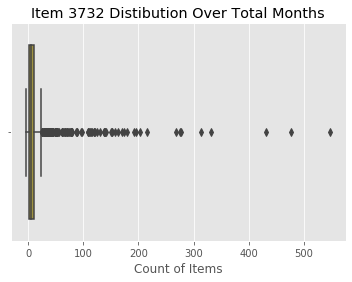

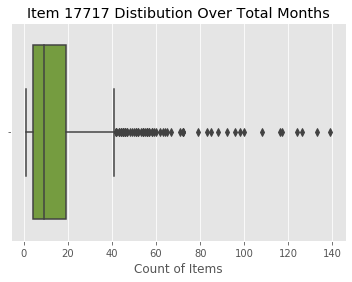

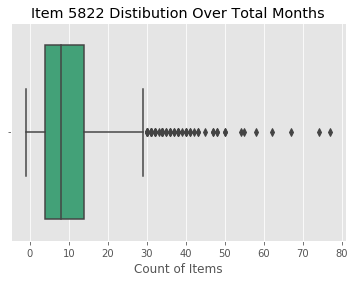

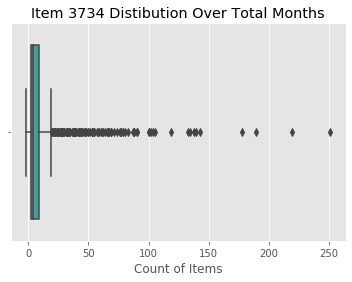

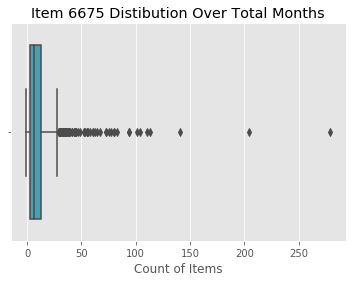

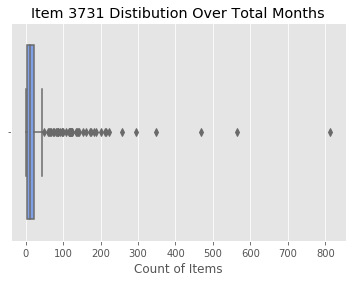

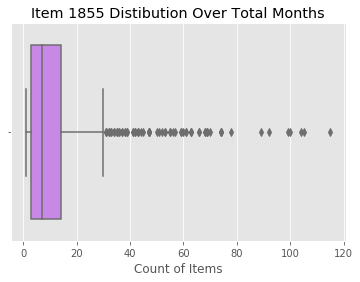

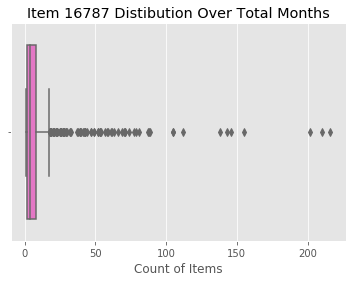

In [141]:
# https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color
colors = sns.color_palette("husl", 10)
for i, item in enumerate(top_10_items):
    sns.boxplot(df.loc[df['item_id']==item,'item_cnt_day'], color = colors[i])
    plt.xlabel('Count of Items')
    plt.title(f'Item {item} Distibution Over Total Months')
    plt.show();

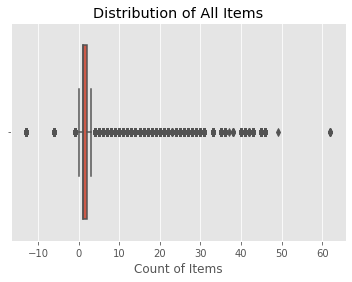

In [24]:
sns.boxplot(df.loc[df['item_id'],'item_cnt_month'])
plt.title('Distribution of All Items')
plt.xlabel('Count of Items');